In [2]:
import plotly.io as pio
pio.renderers.default = "browser"


In [3]:
import pandas as pd

# Load the dataset
file_path = 'pollution_2000_2023.csv'
data = pd.read_csv(file_path)
# Display basic information about the dataset
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum(),
    "Data Types": data.dtypes
}

data_info


{'Shape': (665414, 22),
 'Columns': ['Unnamed: 0',
  'Date',
  'Address',
  'State',
  'County',
  'City',
  'O3 Mean',
  'O3 1st Max Value',
  'O3 1st Max Hour',
  'O3 AQI',
  'CO Mean',
  'CO 1st Max Value',
  'CO 1st Max Hour',
  'CO AQI',
  'SO2 Mean',
  'SO2 1st Max Value',
  'SO2 1st Max Hour',
  'SO2 AQI',
  'NO2 Mean',
  'NO2 1st Max Value',
  'NO2 1st Max Hour',
  'NO2 AQI'],
 'Missing Values': Unnamed: 0           0
 Date                 0
 Address              0
 State                0
 County               0
 City                 0
 O3 Mean              0
 O3 1st Max Value     0
 O3 1st Max Hour      0
 O3 AQI               0
 CO Mean              0
 CO 1st Max Value     0
 CO 1st Max Hour      0
 CO AQI               0
 SO2 Mean             0
 SO2 1st Max Value    0
 SO2 1st Max Hour     0
 SO2 AQI              0
 NO2 Mean             0
 NO2 1st Max Value    0
 NO2 1st Max Hour     0
 NO2 AQI              0
 dtype: int64,
 'Data Types': Unnamed: 0             int64
 Date  

In [4]:
# Step 1: Drop the unnecessary 'Unnamed: 0' column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Step 2: Convert 'Date' to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Step 3: Check and remove duplicates
initial_row_count = data_cleaned.shape[0]
data_cleaned = data_cleaned.drop_duplicates()
duplicates_removed = initial_row_count - data_cleaned.shape[0]

# Step 4: Describe numerical columns to identify potential outliers
numerical_summary = data_cleaned.describe()

# Output the results
{
    "Duplicates Removed": duplicates_removed,
    "Numerical Summary": numerical_summary
}


{'Duplicates Removed': 1739,
 'Numerical Summary':              O3 Mean  O3 1st Max Value  O3 1st Max Hour         O3 AQI  \
 count  663675.000000     663675.000000    663675.000000  663675.000000   
 mean        0.028605          0.038988        10.766949      39.149429   
 std         0.012157          0.014917         3.296334      22.265966   
 min        -0.000706          0.000000         7.000000       0.000000   
 25%         0.019824          0.029000         9.000000      27.000000   
 50%         0.028353          0.038000        10.000000      35.000000   
 75%         0.036882          0.048000        11.000000      44.000000   
 max         0.107353          0.140000        23.000000     237.000000   
 
              CO Mean  CO 1st Max Value  CO 1st Max Hour         CO AQI  \
 count  663675.000000     663675.000000    663675.000000  663675.000000   
 mean        0.329788          0.466171         5.929563       5.254192   
 std         0.275971          0.434902         

In [5]:
# Step 1: Replace negative values with NaN (non-physical values)
numerical_columns = [
    'O3 Mean', 'O3 1st Max Value', 'CO Mean', 'CO 1st Max Value',
    'SO2 Mean', 'SO2 1st Max Value', 'NO2 Mean', 'NO2 1st Max Value'
]
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].applymap(
    lambda x: x if x >= 0 else None
)

# Step 2: Cap extreme outliers using the 99th percentile
for col in numerical_columns:
    upper_cap = data_cleaned[col].quantile(0.99)
    data_cleaned[col] = data_cleaned[col].clip(upper=upper_cap)

# Step 3: Recalculate summary statistics to verify changes
cleaned_summary = data_cleaned.describe()

cleaned_summary


O3 Mean  O3 1st Max Value  O3 1st Max Hour         O3 AQI  \
count  663673.000000     663675.000000    663675.000000  663675.000000   
mean        0.028552          0.038899        10.766949      39.149429   
std         0.012005          0.014625         3.296334      22.265966   
min         0.000000          0.000000         7.000000       0.000000   
25%         0.019824          0.029000         9.000000      27.000000   
50%         0.028353          0.038000        10.000000      35.000000   
75%         0.036882          0.048000        11.000000      44.000000   
max         0.058118          0.079000        23.000000     237.000000   

             CO Mean  CO 1st Max Value  CO 1st Max Hour         CO AQI  \
count  661736.000000     662726.000000    663675.000000  663675.000000   
mean        0.326732          0.459680         5.929563       5.254192   
std         0.249719          0.385799         7.720752       5.014410   
min         0.000000          0.000000         0.000000       0.000000   
25%         0.179167          0.200000         0.000000       2.000000   
50%         0.258333          0.300000         1.000000       3.000000   
75%         0.412500          0.600000         9.000000       7.000000   
max         1.370833          2.200000        23.000000     201.000000   

            SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour        SO2 AQI  \
count  646303.000000      658913.000000     663675.000000  663675.000000   
mean        1.432077           3.786787          8.865193       5.165726   
std         2.118147           6.242061          6.775667      10.381727   
min         0.000000           0.000000          0.000000       0.000000   
25%         0.200000           0.600000          3.000000       0.000000   
50%         0.636364           1.400000          8.000000       1.000000   
75%         1.666667           4.000000         13.000000       6.000000   
max        11.791667          37.000000         23.000000     200.000000   

            NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour        NO2 AQI  
count  662748.000000      663510.000000     663675.000000  663675.000000  
mean       11.470410          23.146106         11.588333      21.787970  
std         8.666645          14.704091          7.888289      14.453261  
min         0.000000           0.000000          0.000000       0.000000  
25%         4.876190          11.000000          5.000000      10.000000  
50%         9.333333          21.000000          9.000000      20.000000  
75%        16.000000          33.000000         20.000000      31.000000  
max        40.304348          65.000000         23.000000     153.000000

In [6]:
# Step 1: Interpolate missing values for numerical columns
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].interpolate(method='linear', limit_direction='forward')

# Step 2: Fill any remaining NaNs with column means
data_cleaned[numerical_columns] = data_cleaned[numerical_columns].fillna(data_cleaned[numerical_columns].mean())

# Verify there are no remaining missing values in numerical columns
missing_after_imputation = data_cleaned[numerical_columns].isnull().sum()

missing_after_imputation


O3 Mean              0
O3 1st Max Value     0
CO Mean              0
CO 1st Max Value     0
SO2 Mean             0
SO2 1st Max Value    0
NO2 Mean             0
NO2 1st Max Value    0
dtype: int64

In [7]:
# Step 1: Add lag features for pollutants (1-day lag)
for col in numerical_columns:
    data_cleaned[f"{col}_lag1"] = data_cleaned[col].shift(1)

# Step 2: Add pollutant ratios as derived features
data_cleaned['PM25_to_PM10_ratio'] = data_cleaned['O3 Mean'] / (data_cleaned['NO2 Mean'] + 1e-6)  # Avoid division by zero
data_cleaned['CO_to_SO2_ratio'] = data_cleaned['CO Mean'] / (data_cleaned['SO2 Mean'] + 1e-6)

# Step 3: Drop rows with NaNs introduced by lagging
data_cleaned = data_cleaned.dropna()

# Verify the newly created features
engineered_features_summary = data_cleaned[['O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio']].describe()

engineered_features_summary


O3 Mean_lag1  PM25_to_PM10_ratio  CO_to_SO2_ratio
count  663674.000000       663674.000000     6.636740e+05
mean        0.028552          173.245595     1.661055e+04
std         0.012005         2530.786554     8.030019e+04
min         0.000000            0.000000     0.000000e+00
25%         0.019824            0.001473     1.730516e-01
50%         0.028353            0.003167     4.272064e-01
75%         0.036882            0.006545     1.245569e+00
max         0.058118        58118.000000     1.370833e+06

In [8]:
from sklearn.preprocessing import StandardScaler

#Initialize scaler
scaler = StandardScaler()

#Scale numerical features (including newly engineered ones)
numerical_features = numerical_columns + [
    'O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio'
]
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

# Verify scaling results
scaled_summary = data_cleaned[numerical_features].describe()

scaled_summary


O3 Mean  O3 1st Max Value       CO Mean  CO 1st Max Value  \
count  6.636740e+05      6.636740e+05  6.636740e+05      6.636740e+05   
mean  -1.725558e-15      1.549939e-15  2.942916e-13      3.521861e-13   
std    1.000001e+00      1.000001e+00  1.000001e+00      1.000001e+00   
min   -2.378342e+00     -2.659732e+00 -1.304621e+00     -1.189852e+00   
25%   -7.270558e-01     -6.768332e-01 -6.041422e-01     -6.715037e-01   
50%   -1.661270e-02     -6.145090e-02 -2.705822e-01     -4.123294e-01   
75%    6.938304e-01      6.223072e-01  3.465074e-01      3.651935e-01   
max    2.462733e+00      2.741957e+00  4.182461e+00      4.511982e+00   

           SO2 Mean  SO2 1st Max Value      NO2 Mean  NO2 1st Max Value  \
count  6.636740e+05       6.636740e+05  6.636740e+05       6.636740e+05   
mean  -2.008351e-13      -2.957917e-13 -7.793875e-15       5.818493e-14   
std    1.000001e+00       1.000001e+00  1.000001e+00       1.000001e+00   
min   -6.665268e-01      -6.042577e-01 -1.321437e+00      -1.573574e+00   
25%   -5.792375e-01      -5.078995e-01 -7.597425e-01      -8.255800e-01   
50%   -3.767118e-01      -3.794220e-01 -2.458170e-01      -1.455851e-01   
75%    9.941252e-02       3.813005e-02  5.241310e-01       6.704087e-01   
max    4.947773e+00       5.337829e+00  3.327589e+00       2.846392e+00   

       O3 Mean_lag1  PM25_to_PM10_ratio  CO_to_SO2_ratio  
count  6.636740e+05        6.636740e+05     6.636740e+05  
mean  -3.026383e-15        1.015722e-17    -9.683104e-15  
std    1.000001e+00        1.000001e+00     1.000001e+00  
min   -2.378343e+00       -6.845529e-02    -2.068558e-01  
25%   -7.270534e-01       -6.845471e-02    -2.068536e-01  
50%   -1.660914e-02       -6.845404e-02    -2.068505e-01  
75%    6.938351e-01       -6.845270e-02    -2.068403e-01  
max    2.462741e+00        2.289596e+01     1.686451e+01

In [ ]:
def featurize_time_series(df, col_name, lag_freq, num_trailing_periods, reduce_rows=True):
    '''
    Function to create lagged features for a time series dataset
    df: Input DataFrame
    col_name: Name of the column to be lagged
    lag_freq: Frequency of the lag (e.g., '1w' for 1 week, '1m' for 1 month)
    num_trailing_periods: Number of trailing periods to be created
    reduce_rows: Whether to reduce rows by grouping based on the lag frequency

    '''
    CONTROL_FOR_COLUMN = 'Address' #might wanna make this []

    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values([CONTROL_FOR_COLUMN, 'Date'])

    # Create a new dataframe with only the required columns
    new_df = df[[CONTROL_FOR_COLUMN, 'Date', col_name]].copy()
    new_df = new_df.rename(columns={col_name: f'{col_name}_t'})
    if reduce_rows:
        if lag_freq == '1w':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='W-MON')]).first().reset_index()
        elif lag_freq == '1m':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='MS')]).first().reset_index()
        elif lag_freq == '1q':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='QS')]).first().reset_index()
        elif lag_freq == '1y':
            new_df = new_df.groupby([CONTROL_FOR_COLUMN, pd.Grouper(key='Date', freq='AS')]).first().reset_index()
    #create lagged features 
    for i in range(1, num_trailing_periods + 1):
        new_df[f'{col_name}_t_minus_{i}'] = new_df.groupby(CONTROL_FOR_COLUMN)[f'{col_name}_t'].shift(i)
    new_df = new_df.dropna() #insufficient trailing periods
    return new_df    

temp_data_cleaned = data_cleaned.copy()

#demonstration of the function
featurized_data_cleaned = featurize_time_series(temp_data_cleaned, 'O3 Mean', '1w', 8)
featurized_data_cleaned

Address       Date  O3 Mean_t  \
8                6100 ARLINGTON BLVD MONTG WARD 2000-02-28  -0.501736   
9                6100 ARLINGTON BLVD MONTG WARD 2000-03-06  -1.163201   
10               6100 ARLINGTON BLVD MONTG WARD 2000-03-13   0.140153   
11               6100 ARLINGTON BLVD MONTG WARD 2000-03-20  -0.447843   
12               6100 ARLINGTON BLVD MONTG WARD 2000-03-27  -1.981431   
...                                         ...        ...        ...   
91481         Walden, Colorado - Chandler Ranch 2014-07-07   1.149550   
91482         Walden, Colorado - Chandler Ranch 2014-07-14   0.345981   
91483         Walden, Colorado - Chandler Ranch 2014-07-21   0.311662   
91484         Walden, Colorado - Chandler Ranch 2014-07-28   0.037281   
91485         Walden, Colorado - Chandler Ranch 2014-08-04   1.272081   

       O3 Mean_t_minus_1  O3 Mean_t_minus_2  O3 Mean_t_minus_3  \
8              -1.270987          -1.545369          -0.820182   
9              -0.501736          -1.270987          -1.545369   
10             -1.163201          -0.501736          -1.270987   
11              0.140153          -1.163201          -0.501736   
12             -0.447843           0.140153          -1.163201   
...                  ...                ...                ...   
91481          -0.129314           0.982956           1.693399   
91482           1.149550          -0.129314           0.982956   
91483           0.345981           1.149550          -0.129314   
91484           0.311662           0.345981           1.149550   
91485           0.037281           0.311662           0.345981   

       O3 Mean_t_minus_4  O3 Mean_t_minus_5  O3 Mean_t_minus_6  \
8              -0.923054          -2.025578          -0.614438   
9              -0.820182          -0.923054          -2.025578   
10             -1.545369          -0.820182          -0.923054   
11             -1.270987          -1.545369          -0.820182   
12             -0.501736          -1.270987          -1.545369   
...                  ...                ...                ...   
91481           1.159379           0.767382           0.865340   
91482           1.693399           1.159379           0.767382   
91483           0.982956           1.693399           1.159379   
91484          -0.129314           0.982956           1.693399   
91485           1.149550          -0.129314           0.982956   

       O3 Mean_t_minus_7  O3 Mean_t_minus_8  
8              -1.084818          -2.054982  
9              -0.614438          -1.084818  
10             -2.025578          -0.614438  
11             -0.923054          -2.025578  
12             -0.820182          -0.923054  
...                  ...                ...  
91481           0.424363           1.115232  
91482           0.865340           0.424363  
91483           0.767382           0.865340  
91484           1.159379           0.767382  
91485           1.693399           1.159379  

[89728 rows x 11 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Split data into training, validation, and testing subsets
training_data = data_cleaned[data_cleaned['Date'] < '2019-01-01']
validation_data = data_cleaned[(data_cleaned['Date'] >= '2019-01-01') & (data_cleaned['Date'] < '2021-01-01')]
testing_data = data_cleaned[data_cleaned['Date'] >= '2021-01-01']

# Step 2: Initialize scaler
scaler = StandardScaler()

# Step 3: Apply scaling to numerical features
numerical_features = [
    'O3 Mean', 'O3 1st Max Value', 'CO Mean', 'CO 1st Max Value',
    'SO2 Mean', 'SO2 1st Max Value', 'NO2 Mean', 'NO2 1st Max Value',
    'O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio'
]

training_data[numerical_features] = scaler.fit_transform(training_data[numerical_features])
validation_data[numerical_features] = scaler.transform(validation_data[numerical_features])
testing_data[numerical_features] = scaler.transform(testing_data[numerical_features])

# Step 4: Save scaled and split datasets
training_data.to_csv('training_data.csv', index=False)
validation_data.to_csv('validation_data.csv', index=False)
testing_data.to_csv('testing_data.csv', index=False)

# Step 5: Display dataset sizes
data_split_summary = {
    "Training Data": training_data.shape,
    "Validation Data": validation_data.shape,
    "Testing Data": testing_data.shape
}

data_split_summary

/var/folders/7n/wd610q_96_5crpp9w0bq0gfh0000gn/T/ipykernel_72440/1017341064.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7n/wd610q_96_5crpp9w0bq0gfh0000gn/T/ipykernel_72440/1017341064.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/7n/wd610q_96_5crpp9w0bq0gfh0000gn/T/ipykernel_72440/1017341064.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

{'Training Data': (525290, 31),
 'Validation Data': (62601, 31),
 'Testing Data': (75783, 31)}

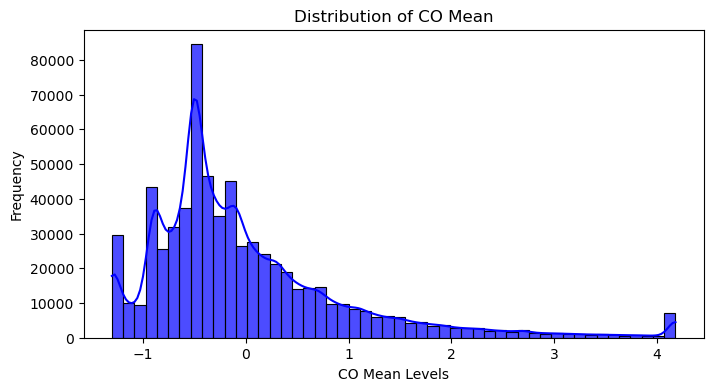

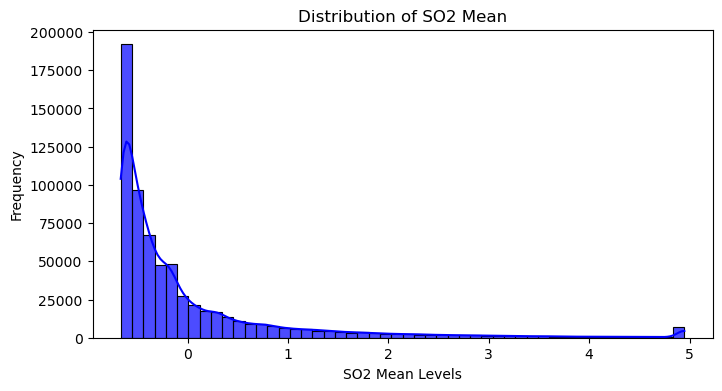

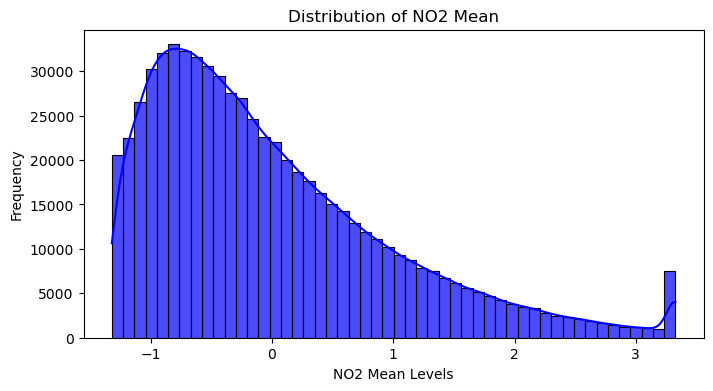

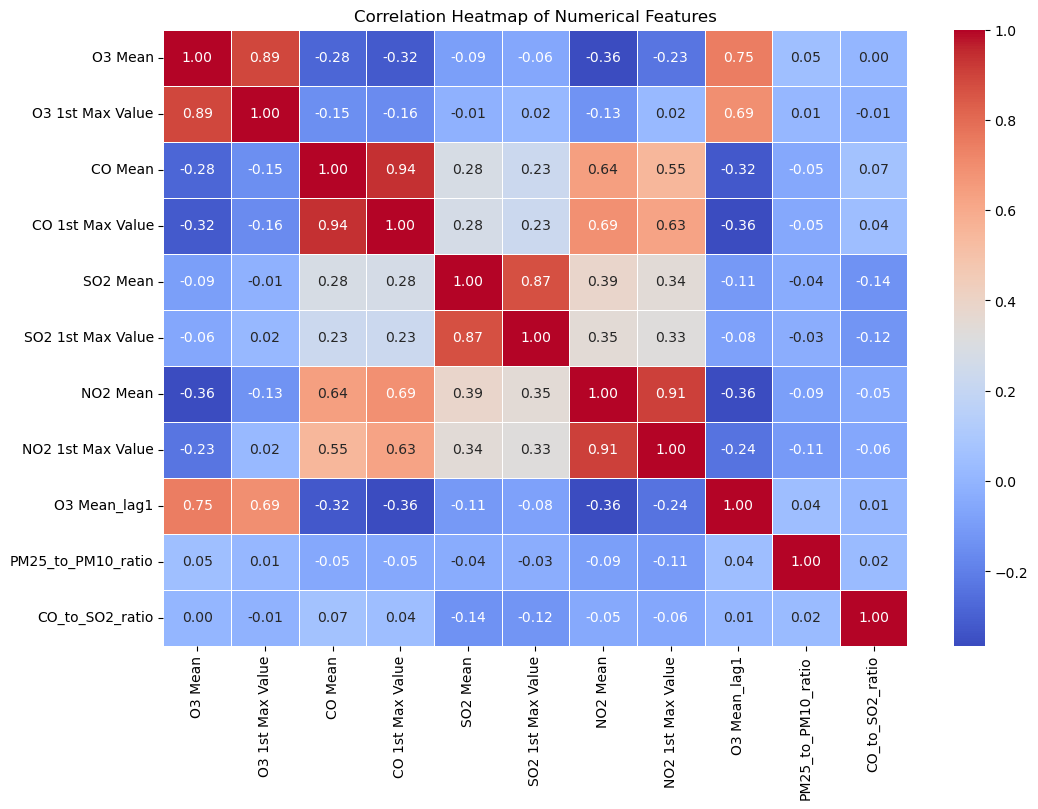

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Exploratory Data Analysis (EDA)

# Visualize the distribution of key pollutants
pollutants = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']

for pollutant in pollutants:
    plt.figure(figsize=(8, 4))
    sns.histplot(data_cleaned[pollutant], bins=50, kde=True, color="blue", alpha=0.7)
    plt.title(f"Distribution of {pollutant}")
    plt.xlabel(f"{pollutant} Levels")
    plt.ylabel("Frequency")
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
corr_matrix = data_cleaned[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [10]:
# Add moving averages (e.g., 7-day rolling averages) for pollutants
for pollutant in ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']:
    data_cleaned[f"{pollutant}_7d_avg"] = data_cleaned[pollutant].rolling(window=7).mean()

# Add seasonality features (e.g., month, season)
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Season'] = data_cleaned['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2]
    else 'Spring' if x in [3, 4, 5]
    else 'Summer' if x in [6, 7, 8]
    else 'Fall'
)

# Encode the 'Season' feature
data_cleaned = pd.get_dummies(data_cleaned, columns=['Season'], drop_first=True)

# Drop rows with NaNs introduced by moving averages
data_cleaned = data_cleaned.dropna()

# Display the dataset structure after feature engineering
data_cleaned.head()


Date                                  Address    State    County  \
7  2000-01-08  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
8  2000-01-09  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
9  2000-01-10  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
10 2000-01-11  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   
11 2000-01-12  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa   

       City   O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI   CO Mean  \
7   Phoenix -1.447411         -1.292215               10      19  4.182461   
8   Phoenix -1.329795         -1.155464               10      20  4.182461   
9   Phoenix -1.545369         -1.634095                9      14  4.182461   
10  Phoenix -1.589433         -1.497343               10      16  4.182461   
11  Phoenix -1.604177         -1.702470                9      13  4.182461   

    ...  PM25_to_PM10_ratio  CO_to_SO2_ratio  O3 Mean_7d_avg  CO Mean_7d_avg  \
7   ...           -0.068455        -0.206854       -1.344491        4.008533   
8   ...           -0.068455        -0.206853       -1.383689        4.182461   
9   ...           -0.068455        -0.206854       -1.375990        4.182461   
10  ...           -0.068455        -0.206854       -1.452278        4.182461   
11  ...           -0.068455        -0.206854       -1.429181        4.182461   

    SO2 Mean_7d_avg  NO2 Mean_7d_avg  Month  Season_Spring  Season_Summer  \
7          2.508445         2.648021      1              0              0   
8          2.817359         2.683037      1              0              0   
9          3.137609         2.675485      1              0              0   
10         3.446523         2.676201      1              0              0   
11         3.596729         2.676201      1              0              0   

    Season_Winter  
7               1  
8               1  
9               1  
10              1  
11              1  

[5 rows x 39 columns]

In [11]:


# Step 1: Create target variable based on percentage change in 'O3 Mean'
def categorize_change(x):
    if -5 <= x <= 5:
        return "0-5%"
    elif -10 <= x <= 10:
        return "5-10%"
    else:
        return ">10%"

data_cleaned['O3_Mean_Change'] = (
    data_cleaned['O3 Mean'].pct_change() * 100  # Calculate percentage change
).fillna(0).apply(categorize_change)  # Categorize changes

# Drop the first row with NaN from pct_change
data_cleaned = data_cleaned.dropna(subset=['O3_Mean_Change'])

# Confirm target variable distribution
target_distribution = data_cleaned['O3_Mean_Change'].value_counts()

# Display target distribution
target_distribution


>10%     550744
0-5%      80524
5-10%     32400
Name: O3_Mean_Change, dtype: int64

In [12]:
# Create season feature
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Season'] = data_cleaned['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2]
    else 'Spring' if x in [3, 4, 5]
    else 'Summer' if x in [6, 7, 8]
    else 'Fall'
)

# One-hot encode the 'Season' feature
season_encoded = pd.get_dummies(data_cleaned['Season'], prefix='Season', drop_first=False)
data_cleaned = pd.concat([data_cleaned, season_encoded], axis=1)

# Verify the one-hot encoded columns
print(data_cleaned.columns)


Index(['Date', 'Address', 'State', 'County', 'City', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Mean_lag1',
       'O3 1st Max Value_lag1', 'CO Mean_lag1', 'CO 1st Max Value_lag1',
       'SO2 Mean_lag1', 'SO2 1st Max Value_lag1', 'NO2 Mean_lag1',
       'NO2 1st Max Value_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio',
       'O3 Mean_7d_avg', 'CO Mean_7d_avg', 'SO2 Mean_7d_avg',
       'NO2 Mean_7d_avg', 'Month', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'O3_Mean_Change', 'Season', 'Season_Fall',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')


Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.88



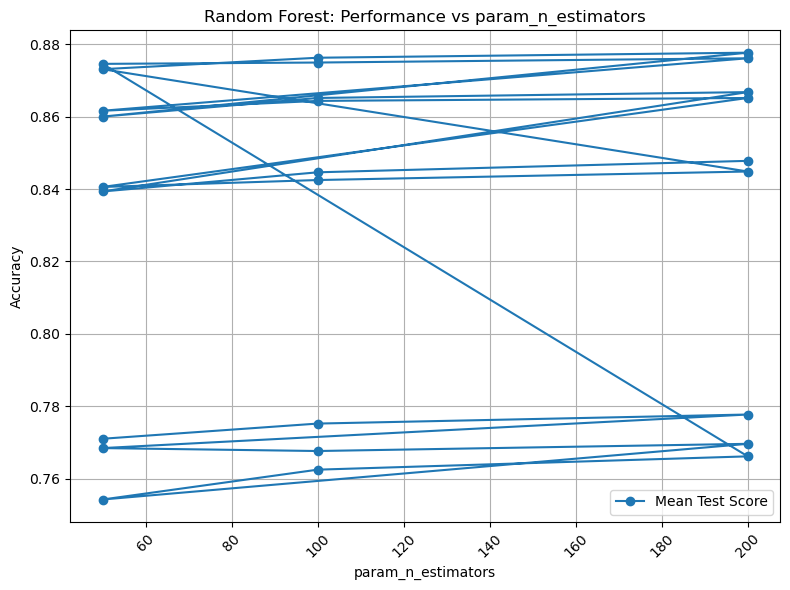

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation accuracy: 0.87



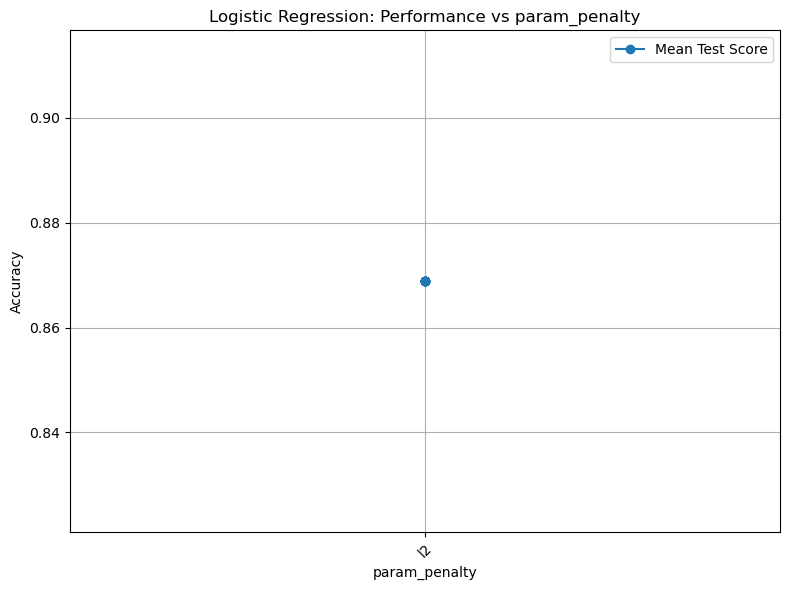

Tuning MLP...


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning:

Training interrupted by user.



: 

: 

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Filter data for NYC
nyc_data = data_cleaned[data_cleaned['City'] == 'New York']

# Split data into training, validation, and testing sets
training_data = nyc_data[nyc_data['Date'] < '2019-01-01']
validation_data = nyc_data[(nyc_data['Date'] >= '2019-01-01') & (nyc_data['Date'] < '2021-01-01')]
testing_data = nyc_data[nyc_data['Date'] >= '2021-01-01']

# Define features and target
features = [
    'O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean',
    'O3 Mean_lag1', 'PM25_to_PM10_ratio', 'CO_to_SO2_ratio',
    'Month', 'Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Fall'
]
target = 'O3_Mean_Change'

# Separate features and target
X_train = training_data[features]
y_train = training_data[target]

X_val = validation_data[features]
y_val = validation_data[target]

X_test = testing_data[features]
y_test = testing_data[target]

# Hyperparameter grids for models
param_grids = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight='balanced'),
        "param_grid": {
            "n_estimators": [50, 100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10],
        },
    },
    #"SVM": {
     #   "model": SVC(probability=True, random_state=42),
    #3   "param_grid": {
       #     "C": [0.1, 1, 10],
        #    "kernel": ["linear", "rbf", "poly"],
      #      "gamma": ["scale", "auto"],
     #   },
  #  },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=10000),
        "param_grid": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs", "saga"],
        },
    },
    "MLP": {
        "model": MLPClassifier(random_state=42, max_iter=10000),
        "param_grid": {
            "hidden_layer_sizes": [(50,), (100,), (100, 50)],
            "activation": ["relu", "tanh"],
            "alpha": [0.001, 0.01],
        },
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    },
}


# Function to plot performance vs. hyperparameter values
def plot_hyperparameter_performance(grid_search, model_name):
    results = pd.DataFrame(grid_search.cv_results_)
    
    # Identify hyperparameters used in the grid
    param_columns = [col for col in results.columns if col.startswith("param_")]
    
    # Plot each hyperparameter's impact on performance
    for param in param_columns:
        plt.figure(figsize=(8, 6))
        param_values = results[param]
        
        # Convert non-numeric values to strings for plotting
        if not np.issubdtype(param_values.dtype, np.number):
            param_values = param_values.astype(str)
        
        # Scatter plot of mean test scores vs. hyperparameter values
        plt.plot(
            param_values, 
            results["mean_test_score"], 
            marker="o", 
            label="Mean Test Score"
        )
        plt.title(f"{model_name}: Performance vs {param}")
        plt.xlabel(param)
        plt.ylabel("Accuracy")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# Train and tune each model
best_models = {}
for model_name, config in param_grids.items():
    print(f"Tuning {model_name}...")
    grid_search = GridSearchCV(
        estimator=config["model"],
        param_grid=config["param_grid"],
        scoring="accuracy",
        cv=3
    )
    grid_search.fit(X_train, y_train)
    
    # Store the best model and parameters
    best_models[model_name] = {
        "model": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_,
    }
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}\n")
    
    # Plot performance vs. hyperparameters
    plot_hyperparameter_performance(grid_search, model_name)



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Determine the best model based on validation accuracy
best_model_name = max(
    best_models,
    key=lambda name: accuracy_score(
        y_val, best_models[name]["model"].predict(X_val)
    )
)
best_model_info = best_models[best_model_name]
best_model = best_model_info["model"]

# Print the best model details
print(f"The best model is: {best_model_name}")
print(f"Best parameters: {best_model_info['best_params']}")
print(f"Validation Accuracy: {best_model_info['best_score']:.2f}\n")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)

print(f"{best_model_name} (Tuned) Testing Evaluation:")
print(f"  Testing Accuracy: {accuracy_score(y_test, y_pred_test):.2f}")
print(f"  Testing F1 Score: {f1_score(y_test, y_pred_test, average='weighted'):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


The best model is: MLP
Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}
Validation Accuracy: 0.98

MLP (Tuned) Testing Evaluation:
  Testing Accuracy: 0.98
  Testing F1 Score: 0.98

Classification Report:
              precision    recall  f1-score   support

        0-5%       0.89      0.93      0.91        72
       5-10%       0.81      0.67      0.73        63
        >10%       0.99      1.00      0.99      1713

    accuracy                           0.98      1848
   macro avg       0.90      0.86      0.88      1848
weighted avg       0.98      0.98      0.98      1848



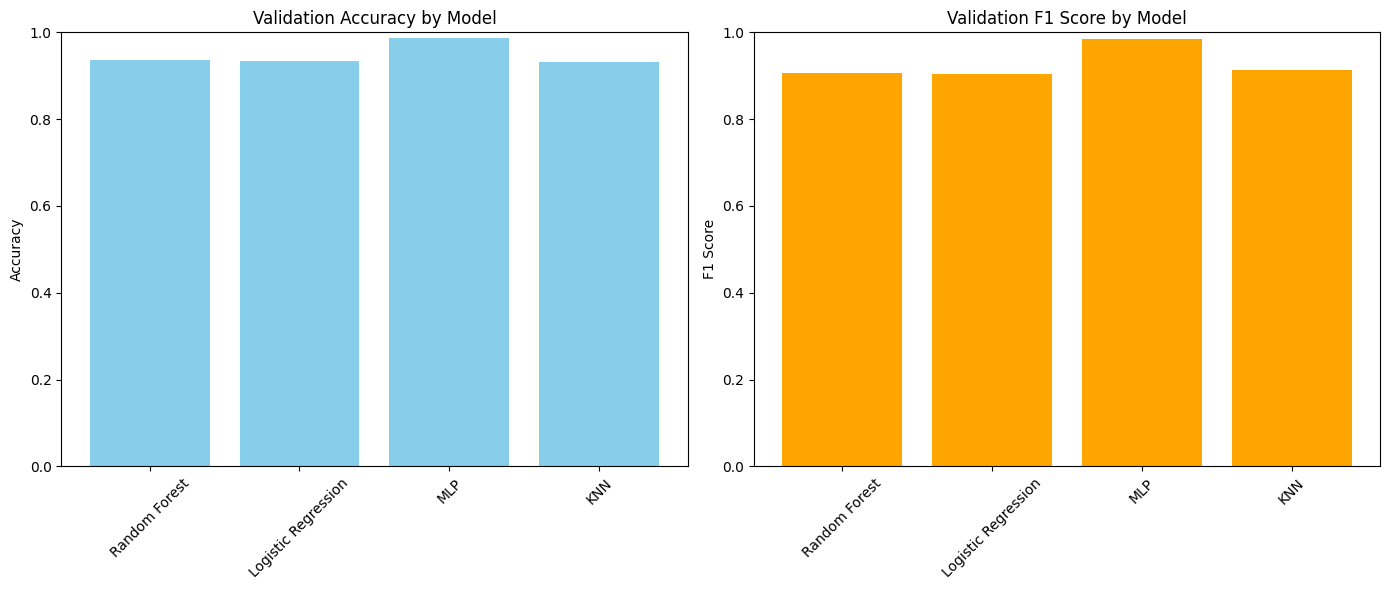

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for visualization
model_names = list(best_models.keys())
accuracies = [accuracy_score(y_val, model["model"].predict(X_val)) for model in best_models.values()]
f1_scores = [f1_score(y_val, model["model"].predict(X_val), average='weighted') for model in best_models.values()]

# Plot Accuracy and F1 Score
plt.figure(figsize=(14, 6))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.bar(model_names, accuracies, color='skyblue')
plt.title("Validation Accuracy by Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)

# F1 Score Bar Chart
plt.subplot(1, 2, 2)
plt.bar(model_names, f1_scores, color='orange')
plt.title("Validation F1 Score by Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Collect metrics
summary_data = []
for model_name, info in best_models.items():
    model = info["model"]
    y_pred_val = model.predict(X_val)
    summary_data.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_val, y_pred_val),
        "F1 Score": f1_score(y_val, y_pred_val, average='weighted'),
        "Best Parameters": info["best_params"]
    })

summary_df = pd.DataFrame(summary_data)

# Display as a table
print(summary_df)


                 Model  Accuracy  F1 Score  \
0        Random Forest  0.935531  0.905388   
1  Logistic Regression  0.934799  0.903296   
2                  MLP  0.986081  0.984979   
3                  KNN  0.932601  0.912253   

                                     Best Parameters  
0  {'max_depth': None, 'min_samples_split': 2, 'n...  
1    {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}  
2  {'activation': 'tanh', 'alpha': 0.01, 'hidden_...  
3          {'n_neighbors': 7, 'weights': 'distance'}  


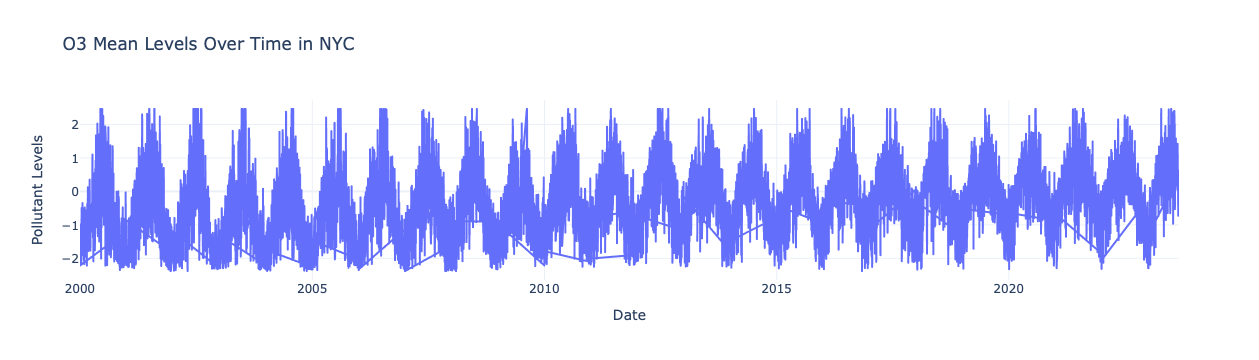

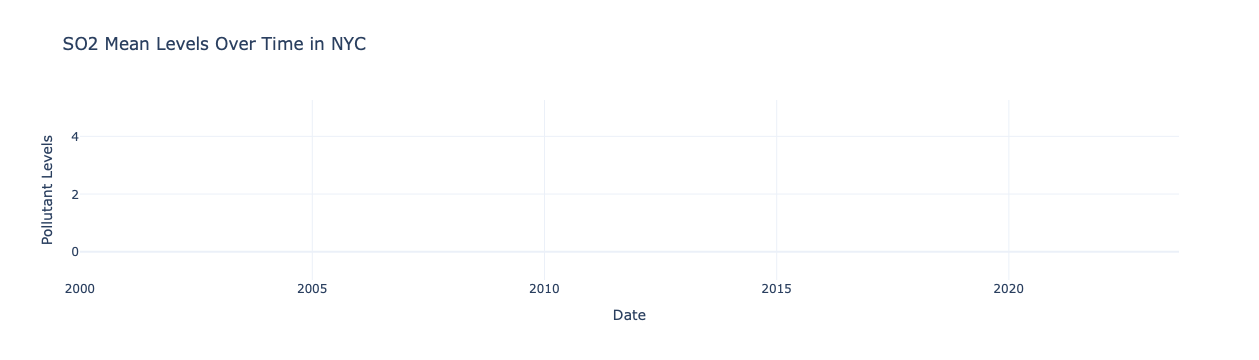

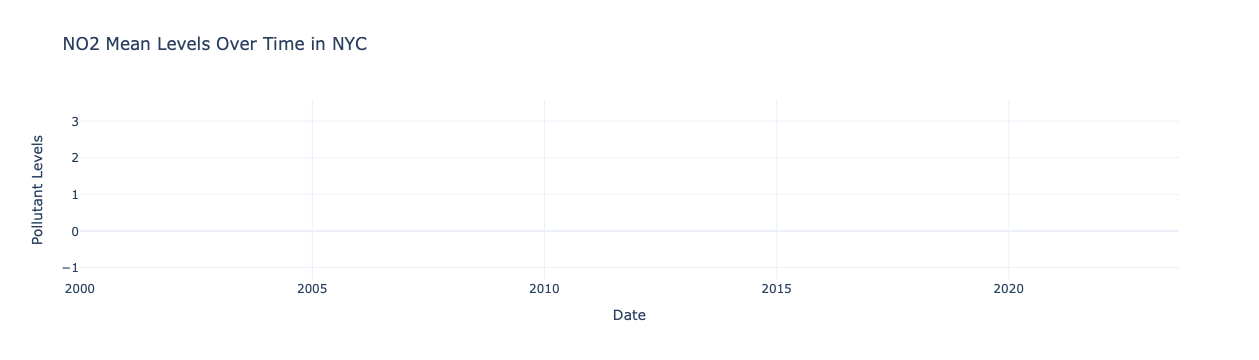

In [ ]:
import plotly.express as px
import plotly.io as pio

# Ensure the correct renderer is set for JupyterLab
pio.renderers.default = "jupyterlab"

# Plot pollutant trends over time
pollutants = ['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean']

for pollutant in pollutants:
    fig = px.line(
        nyc_data, 
        x='Date', 
        y=pollutant,
        title=f"{pollutant} Levels Over Time in NYC",
        labels={'Date': 'Date', pollutant: 'Pollutant Levels'}
    )
    fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Pollutant Levels",
        template="plotly_white"
    )
    fig.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Access the best-tuned Random Forest model
rf_model = best_models["Random Forest"]["model"]

# Aggregate feature importance across all classes
feature_importances = np.mean([
    estimator.feature_importances_ for estimator in rf_model.estimators_
], axis=0)

# Use the feature names from the training data
actual_features = X_train.columns.tolist()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': actual_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest - OneVsRest)')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Access the best-tuned model (replace "Random Forest" with the best model name if needed)
best_model = best_models["Random Forest"]["model"]

# Predictions for validation and test sets
y_pred_val = best_model.predict(X_val)
y_pred_test = best_model.predict(X_test)

# Metrics for Validation and Testing
metrics = {
    "Accuracy": [accuracy_score(y_val, y_pred_val), accuracy_score(y_test, y_pred_test)],
    "F1 Score": [f1_score(y_val, y_pred_val, average='weighted'), f1_score(y_test, y_pred_test, average='weighted')]
}

# Bar Chart
labels = ['Validation', 'Testing']
x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 6))
acc_bars = ax.bar(x - width/2, metrics['Accuracy'], width, label='Accuracy', color='skyblue')
f1_bars = ax.bar(x + width/2, metrics['F1 Score'], width, label='F1 Score', color='orange')

# Add labels and titles
ax.set_xlabel('Dataset')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels
for bars in [acc_bars, f1_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()
